In [1]:
include("../EuclidElements.jl");

# Book 1

## Proposition 2

To place at a given point a straight line equal to a given straight line...

### I.1 Easy Unit

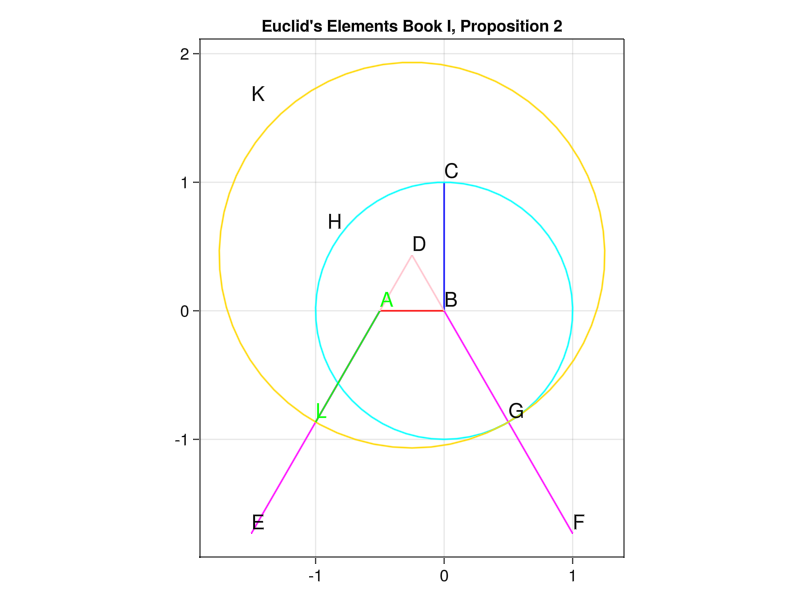

In [2]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 2")

# Let A be a given point
A = Point2f(-0.5, 0)

# Let BC be a given straight line
B = Point2f(0, 0)
C = Point2f(0, 1)
BC = lines!([B,C], color=:blue)

# Draw AB
AB = lines!([A,B], color=:red)

# Draw an equilateral triangle, DAB
D = Point2f(-(1/4), (√3)/4)
DA = lines!([D, A], color=:pink)
DB = lines!([D, B], color=:pink)

#Draw straight lines AE, BF, straight from DA, DB
E = Point2f((D[1]*2)-(2*(1/2)), 2*(-(√3)/2))
AE = lines!([A,E], color=:magenta)
F = Point2f(2*(1/2), 2*(-(√3)/2))
BF = lines!([B,F], color=:magenta)

# Circle CGH with center B, radius BC (1)
CGH = lines!(Circle(B, norm(B-C)), color=:cyan)
G = Point2f(1/2, -(√3)/2)
H = Point2f(-(√2)/2 - 0.2, (√2)/2 - 0.1)

# Circle GKL with center D, radius DG (math!)
GKL = lines!(Circle(D, norm(D-G)), color=:gold)
K = Point2f(-1.5, 1.6)
L = Point2f(-1, -(√3)/2)

# Now, we know BC = BG, and DL = DG; Also, DA = DB, and AL = BG
# ergo, AL = BG, BC = BG, and thus AL = BC

#So, AL is the equal straight line drawn!
AL = lines!([A,L], color=:green1)

#Now draw the point labels, highlighting A and L!
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")
Gpoint = text!(G, text="G")
Hpoint = text!(H, text="H")
Kpoint = text!(K, text="K")
Lpoint = text!(L, text="L", color=:green1)

#Draw and show the chart :)
current_figure()

### I.2 Rotated and Difficult

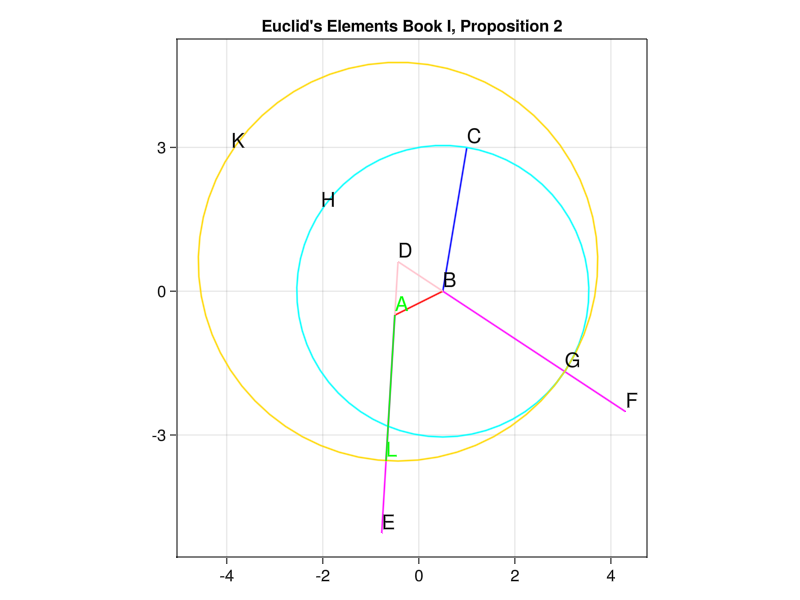

In [3]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 2")

# Let A be a given point
A = Point2f(-0.5, -0.5)

# Let BC be a given straight line
B = Point2f(0.5, 0)
C = Point2f(1, 3)
BC = lines!([B,C], color=:blue)

# Draw AB
AB = lines!([A,B], color=:red)

# Draw an equilateral triangle, DAB
D = equilateral_from(A,B)
DA = lines!([D, A], color=:pink)
DB = lines!([D, B], color=:pink)

#Draw straight lines AE, BF, straight from DA, DB
r_BC = norm(B-C)
E = continue_line(D, A, r_BC*1.5)
AE = lines!([A,E], color=:magenta)

F = continue_line(D, B, r_BC*1.5)
BF = lines!([B,F], color=:magenta)

# Circle CGH with center B, radius BC (1)
r_CGH = norm(B-C)
CGH = lines!(Circle(B, r_CGH), color=:cyan)
G = continue_line(D, B, r_CGH)
H = continue_line(B, D, r_CGH - norm(B-D))

# Circle GKL with center D, radius DG (math!)
r_GKL = norm(D-G)
GKL = lines!(Circle(D, r_GKL), color=:gold)
L = continue_line(D, A, r_GKL - norm(D-A))
K = continue_line(B, D, norm(D-G))

# Now, we know BC = BG, and DL = DG; Also, DA = DB, and AL = BG
# ergo, AL = BG, BC = BG, and thus AL = BC

#So, AL is the equal straight line drawn!
AL = lines!([A,L], color=:green1)

#Now draw the point labels, highlighting A and L!
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")
Gpoint = text!(G, text="G")
Hpoint = text!(H, text="H")
Kpoint = text!(K, text="K")
Lpoint = text!(L, text="L", color=:green1)

#Draw and show the chart :)
current_figure()

### ANIMATION

In [4]:
# Let A be a given point
A_0 = Point2f0(-0.5, -0.5)
A = Observable(A_0)

# Let BC be a given straight line
B_0 = Point2f0(0.5, 0)
C_0 = Point2f0(1, 3)
B = Observable(B_0)
C = Observable(C_0)

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 2")
xlims!(ax, -7,8)
ylims!(ax, -7,7)

# Draw the line AB on which to start
L_line = equivalent_line(A[], B[], C[], color=:pink, linewidth=5f0)
L = Point(L_line)

# Draw AL
AL = straight_line(A[], L, color=RGB(0.0, 0.8, 0.0), linewidth=2f0)

# Now make sure BC is drawn correctly
BC = straight_line(B[], C[], color=:blue, linewidth=2f0)
fill_line(BC)

#Now draw the point labels, highlighting A and L!
LAlpha = Observable(0f0)
Apoint = text!(A, text="A", color=RGB(0.0, 0.8, 0.0))
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Lpoint = text!(L, text="L", color=@lift(RGBA(0.0, 0.8, 0.0, $LAlpha)))

# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0,5π, step=5π/(d_s*framerate))

record(f, "Euclid-I-2.gif", timestamps; framerate=framerate) do t
    animate_equivalent(L_line, 0.5π, 2.5π, t, fade_start=3π, fade_end=4π)
    animate_line(AL, 2.5π, 3π, t)

    # Animate the filled equilateral triangle appearing
    if t > 2.5π && t <= 3.5π
        showL = t - 2.5π
        LAlpha[] = showL
    end
end;

![animation](Euclid-I-2.gif)